In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/xebcam/DS_ML_II_2022/main/datasets/fraud_challenge.csv')

In [ ]:
from google.colab.data_table import DataTable
DataTable.max_columns = 30
pd.set_option('display.max_columns', None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   account_age_days       149892 non-null  float64
 1   transaction_amt        149870 non-null  float64
 2   transaction_adj_amt    149886 non-null  float64
 3   historic_velocity      149885 non-null  float64
 4   ip_address             149873 non-null  object 
 5   user_agent             149887 non-null  object 
 6   email_domain           149910 non-null  object 
 7   phone_number           149873 non-null  object 
 8   billing_city           149884 non-null  object 
 9   billing_postal         149876 non-null  float64
 10  billing_state          149887 non-null  object 
 11  card_bin               149872 non-null  float64
 12  currency               149892 non-null  object 
 13  cvv                    149877 non-null  object 
 14  signature_image        149895 non-nu

In [ ]:
df = df[['account_age_days', 'transaction_amt', 'transaction_adj_amt', 'historic_velocity', 'card_bin', 'currency', 'cvv', 'transaction_type', 'inital_amount', 'EVENT_LABEL']]

In [ ]:
df.shape

(150000, 10)

In [ ]:
df.isna().sum().sum()

1070

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(148930, 10)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
X = pd.get_dummies(df, columns=['currency', 'cvv', 'transaction_type'])
X.shape

(148930, 62)

In [ ]:
y = df['EVENT_LABEL']

In [ ]:
X.drop(columns=['EVENT_LABEL'], inplace=True)
X.info()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
df.loc[df['EVENT_LABEL'] == 'fraud']

account_age_days  transaction_amt  transaction_adj_amt  \
10                4602.0           1587.0                 32.0   
11                5641.0           3370.0                 50.0   
118               5150.0           2886.0                 41.0   
137               5287.0           3497.0                 39.0   
143               6019.0           2837.0                 31.0   
...                  ...              ...                  ...   
149936            4161.0           3095.0                 44.0   
149942            5114.0           2606.0                 44.0   
149954            5774.0           3239.0                 48.0   
149966            5784.0           3234.0                 42.0   
149980            5586.0           2685.0                 37.0   

        historic_velocity  card_bin currency cvv transaction_type  \
10                 5171.0   56397.0      cad   X                F   
11                 5409.0   49368.0      cad   B                U   
118                4868.0   65065.0      cad   H                V   
137                3573.0   30549.0      cad   I                I   
143                5496.0   35230.0      cad   W                H   
...                   ...       ...      ...  ..              ...   
149936             3922.0   43476.0      cad   U                G   
149942             2767.0   42549.0      usd   G                I   
149954             6601.0   49304.0      cad   W                F   
149966             2798.0   46135.0      usd   H                D   
149980             4934.0   30026.0      cad   G                I   

        inital_amount EVENT_LABEL  
10             9981.0       fraud  
11             3585.0       fraud  
118            3958.0       fraud  
137           11640.0       fraud  
143            7818.0       fraud  
...               ...         ...  
149936         3208.0       fraud  
149942        12945.0       fraud  
149954         3590.0       fraud  
149966         3562.0       fraud  
149980        11139.0       fraud  

[8096 rows x 10 columns]

In [ ]:
test1 = X_test.iloc[[10]]
test1

account_age_days  transaction_amt  transaction_adj_amt  \
21793            3321.0           1696.0                 41.0   

       historic_velocity  card_bin  inital_amount  currency_cad  currency_eur  \
21793             3969.0   48896.0         1102.0             1             0   

       currency_usd  cvv_A  cvv_B  cvv_C  cvv_D  cvv_E  cvv_F  cvv_G  cvv_H  \
21793             0      0      0      0      0      0      0      1      0   

       cvv_I  cvv_J  cvv_K  cvv_L  cvv_M  cvv_N  cvv_O  cvv_P  cvv_Q  cvv_R  \
21793      0      0      0      0      0      0      0      0      0      0   

       cvv_S  cvv_T  cvv_U  cvv_V  cvv_W  cvv_X  cvv_Y  cvv_Z  \
21793      0      0      0      0      0      0      0      0   

       transaction_type_A  transaction_type_B  transaction_type_C  \
21793                   0                   0                   0   

       transaction_type_D  transaction_type_E  transaction_type_F  \
21793                   0                   0                   0   

       transaction_type_G  transaction_type_H  transaction_type_I  \
21793                   0                   0                   0   

       transaction_type_J  transaction_type_K  transaction_type_L  \
21793                   0                   0                   0   

       transaction_type_M  transaction_type_N  transaction_type_O  \
21793                   0                   0                   0   

       transaction_type_P  transaction_type_Q  transaction_type_R  \
21793                   0                   0                   0   

       transaction_type_S  transaction_type_T  transaction_type_U  \
21793                   0                   0                   1   

       transaction_type_V  transaction_type_W  transaction_type_X  \
21793                   0                   0                   0   

       transaction_type_Y  transaction_type_Z  
21793                   0                   0

In [ ]:
prediction = model.predict(X_test)
prediction

array(['legit', 'legit', 'legit', ..., 'legit', 'legit', 'legit'],
      dtype=object)

In [ ]:
testpredict = model.predict(test1)
testpredict

array(['legit'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, prediction)
score

0.9568253541932451

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction )

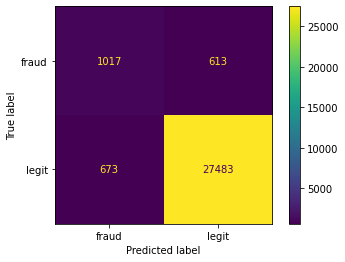

In [ ]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [ ]:
#Exactitud y tasa de reconocimiento
(1017 + 27483)/(1017 + 613 + 27483 + 673)

0.9568253541932451

In [ ]:
#Tasa de error y tasa de clasificación errónea
(673 + 613)/(1017 + 613 + 27483 + 673)

0.04317464580675485

In [ ]:
#Sensibilidad, tasa positiva real, y recordatorio
27483/(27483 + 613)

0.9781819476082004

In [ ]:
#Especificidad y tasa negativa real
1017/(1017 + 613)

0.6239263803680981

In [ ]:
#Presicion
27483/(27483 + 673)

0.9760974570251456

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.208314 to fit



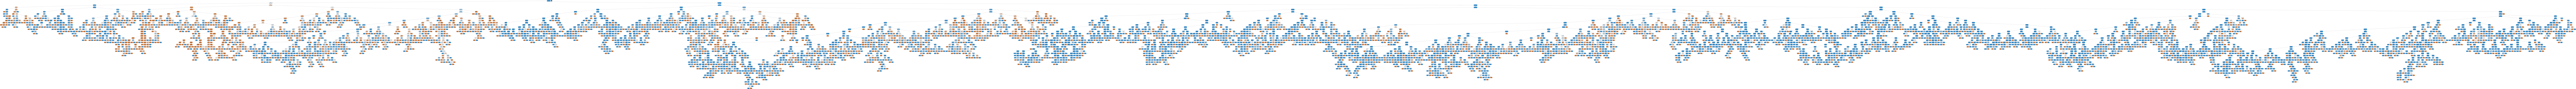

In [ ]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(model, out_file=None,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())